# Social Media Analytics Assignment 1
### MSBA Spring 2018
Ryan Conklin, Reed Dalton, Gihani Dissanayake, Ali Prasla, Jake Schmidt

# Part 2

In [1]:
#pip install tqdm

In [2]:
from utils import scrape
raw = scrape('tensorflow', 5000) # requires the package called 'tqdm'

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
"""
preprocessing into form:
Column 1  Column 2  Column 3 (type of content)
@ABC      @ABC      Tweet
@XYZ      @ABC      RT
"""
import pandas as pd, numpy as np

# extract Mentions
data = raw.text.str.extractall(r'(?<!RT\s)@(\w+)')[0].reset_index(1,drop=True).rename('target').to_frame().join(raw.user_name)
data['type'] = 'mention'

# add Retweets
data = data.append(raw.text.str.extract(r'RT @(\S+):', expand=False).dropna().rename('target').to_frame().join(raw.user_name))
data.type.fillna('rt',inplace=True)

# add normal Tweets
data = data.append(pd.DataFrame({'target': raw.user_name, 'type': 'tweet', 'user_name': raw.user_name}).loc[lambda i: ~i.index.isin(data.index)]).sort_index()
data.type.fillna('tweet',inplace=True)

# reorder columns
data = data[['user_name','target','type']]
# data.to_csv("tweets.csv")

In [4]:
#above is how we scraped, but for consistency, we are reading in saved file 
data = pd.read_csv("tweets.csv", index_col = 'Unnamed: 0')
data[:10]

,user_name,target,type
0,ArakilChentoufi,TensorFlow,rt
1,ArakilChentoufi,TFBestPractices,rt
2,ArakilChentoufi,kdnuggets,rt
3,ArakilChentoufi,mxlearn,rt
4,ArakilChentoufi,java,rt
5,ArakilChentoufi,granvilleDSC,mention
5,ArakilChentoufi,DataScienceCtrl,mention
5,ArakilChentoufi,Ronald_vanLoon,rt
6,firebitsbr,KirkDBorne,rt
7,ArakilChentoufi,googlestudents,rt


In [16]:
from networkx import from_pandas_dataframe, betweenness_centrality, closeness_centrality, draw
g = from_pandas_dataframe(data, source='user_name', target='target')
results = pd.DataFrame({'degree': g.degree(),'betweenness': betweenness_centrality(g), 'closeness': closeness_centrality(g)})

In [17]:
#showing the degree, betweenness, and closeness of each node
results.sort_values('betweenness',ascending=False).head(10)

,betweenness,closeness,degree
TensorFlow,0.218845,0.239368,467
arichduvet,0.101855,0.239518,64
rstudio,0.064071,0.203120,161
java,0.052273,0.195244,141
TheNextWeb,0.042372,0.184968,115
kdnuggets,0.033018,0.204635,68
ErmiaBivatan,0.029586,0.204581,18
ArakilChentoufi,0.027734,0.210786,23
KirkDBorne,0.027071,0.195866,61
gp_pulipaka,0.026322,0.191734,68


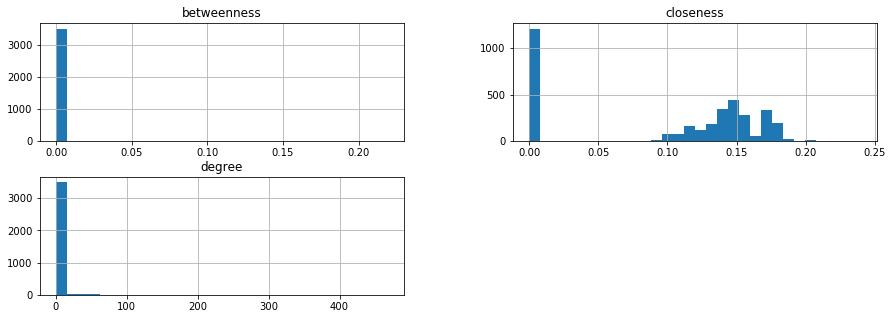

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
results.hist(bins=30);

C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is dep

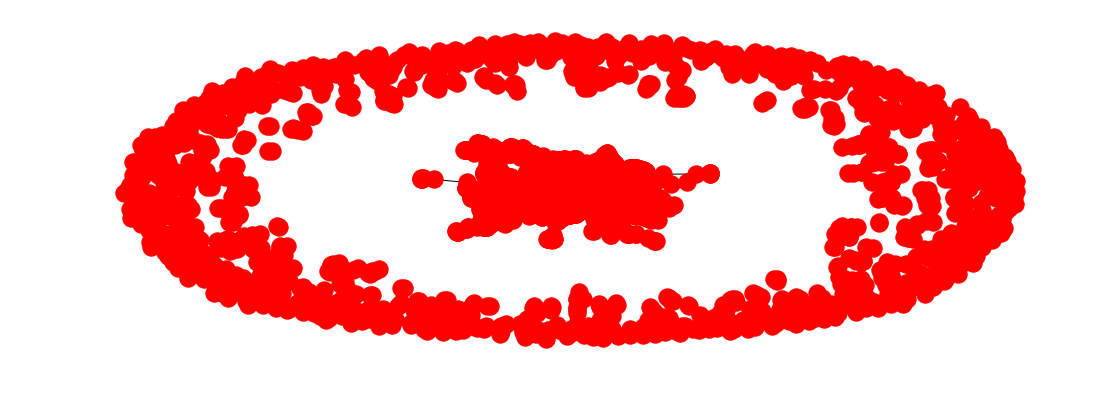

In [19]:
draw(g);

In [9]:
#1st variable
rts = data[data['type'] == 'rt']
retweets = pd.DataFrame(rts['target'].value_counts())

#2nd variable
listed = pd.DataFrame(data['target'].value_counts())

#3rd variable
ments = data[data['type'] == 'mention']
mentions = pd.DataFrame(ments['target'].value_counts())

In [10]:
#4th variable as the sum of the standardized degree, closeness, and betweenness
n = len(results)
results['std_degree'] = (results['degree'])/(n-1)
results['sum'] = results['betweenness'] + results['closeness'] + results['std_degree']

dbc = pd.DataFrame(results['sum'])

results.sort_values('sum',ascending=False).head(10)

,betweenness,closeness,degree,std_degree,sum
TensorFlow,0.218845,0.239368,467,0.131884,0.590097
arichduvet,0.101855,0.239518,64,0.018074,0.359447
rstudio,0.064071,0.203120,161,0.045467,0.312658
java,0.052273,0.195244,141,0.039819,0.287336
TheNextWeb,0.042372,0.184968,115,0.032477,0.259816
Ronald_vanLoon,0.025208,0.205594,98,0.027676,0.258478
kdnuggets,0.033018,0.204635,68,0.019204,0.256857
ArakilChentoufi,0.027734,0.210786,23,0.006495,0.245015
KirkDBorne,0.027071,0.195866,61,0.017227,0.240164
ErmiaBivatan,0.029586,0.204581,18,0.005083,0.239250


In [20]:
score = (.15)*retweets['target'] + (.35)*listed['target'] + (.20)*mentions['target'] + (.30)*dbc['sum']
score.sort_values(ascending = False).head(50)

TensorFlow         299.377029
rstudio             92.793797
java                72.686201
TheNextWeb          64.177945
kdnuggets           49.027057
KirkDBorne          37.922049
analyticbridge      34.365855
granvilleDSC        33.619355
github              33.515544
googlecloud         30.614541
fchollet            28.609929
random_forests      26.961729
Reza_Zadeh          26.863950
dennybritz          25.157164
DataScienceCtrl     25.064173
OpenAI              21.754666
yufengg             19.763977
TDataScience        19.708576
bobehayes           18.550383
Rbloggers           18.508293
mza                 17.961248
Google              17.606807
DynamicWebPaige     16.059829
aronchick            8.999678
SamueL_WonG_         8.088721
ManningBooks         7.908083
hopshadoop           6.954252
awscloud             6.294552
cfregly              5.794709
jessenleon           5.792589
AnalyticsVidhya      5.649446
indexconf            5.455607
alexismp             5.145577
margaretmz